In [4]:
import numpy as np
np.set_printoptions(threshold=10000,suppress=True)
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

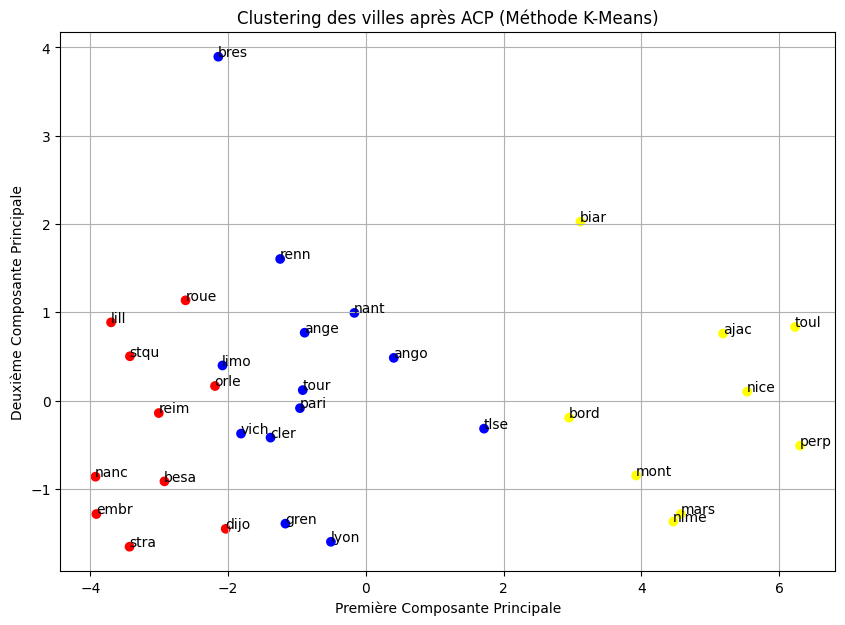

In [10]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import warnings


# Chargement des données depuis le fichier CSV
file_path = './villes.csv' 
data = pd.read_csv(file_path, sep=';')

# Séparation des étiquettes (première colonne) et des données numériques
labels = data.iloc[:, 0].values  # Extraction des noms des villes
X = data.iloc[:, 1:].values  # Extraction des valeurs numériques

# Standardisation des données (centrage-réduction)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Application de l'Analyse en Composantes Principales (ACP)
pca = PCA(n_components=2)  # On réduit à 2 dimensions pour la visualisation
X_pca = pca.fit_transform(X_scaled)  # Transformation des données

# Application du clustering K-Means avec 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)  # Initialisation avec 3 clusters
clustering = kmeans.fit_predict(X_scaled)  # Affectation des clusters aux données

#Couleurs pour chaque cluster
colors = ['red', 'yellow', 'blue']

# Création de la figure
plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clustering,
            cmap=mcolors.ListedColormap(colors))

# Ajout des labels des villes sur le graphique
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')

# Titre et axes
plt.xlabel('Première Composante Principale')
plt.ylabel('Deuxième Composante Principale')
plt.title('Clustering des villes après ACP (Méthode K-Means)')
plt.grid(True)

# Affichage du graphique
plt.show()
 


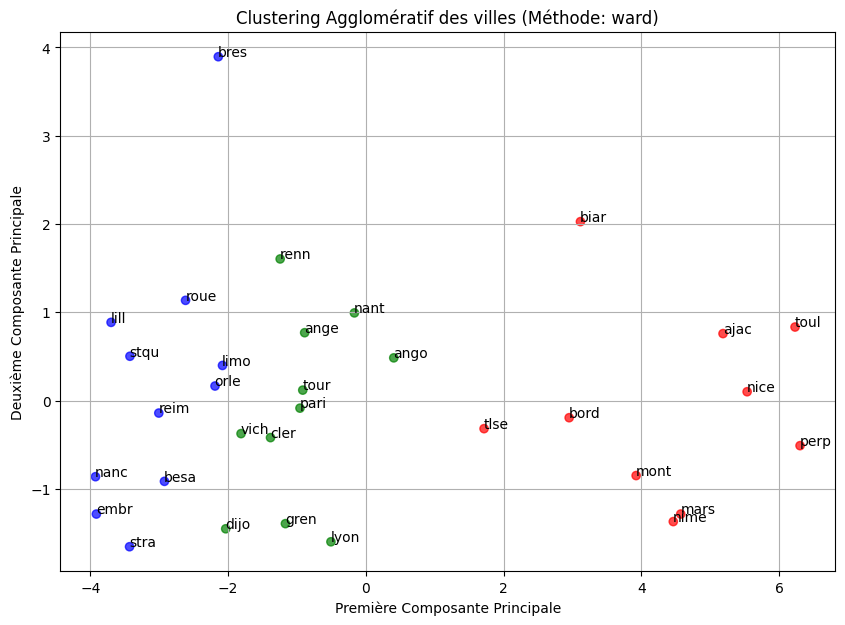

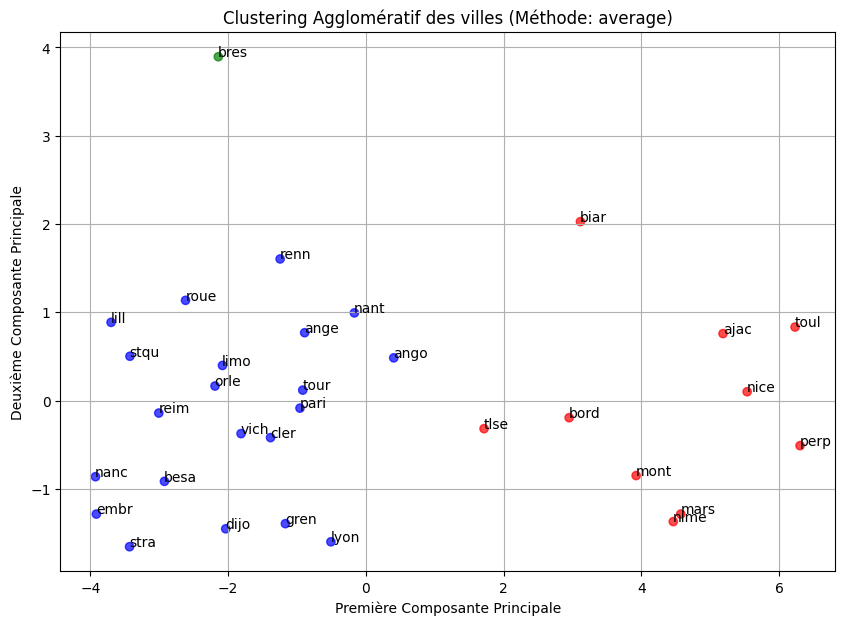

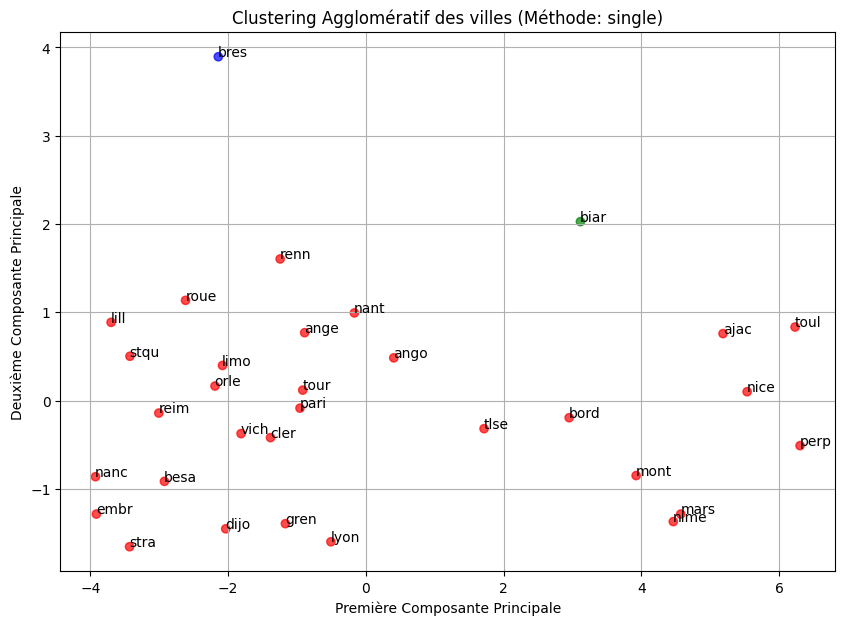

In [23]:

from sklearn.cluster import AgglomerativeClustering
# Chargement des données depuis le fichier CSV
file_path = './villes.csv' 
data = pd.read_csv(file_path, sep=';')

# Séparation des étiquettes (première colonne) et des données numériques
labels = data.iloc[:, 0].values  # Extraction des noms des villes
X = data.iloc[:, 1:].values  # Extraction des valeurs numériques

# Standardisation des données (centrage-réduction)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Application de l'Analyse en Composantes Principales (ACP)
pca = PCA(n_components=2)  # On réduit à 2 dimensions pour la visualisation
X_pca = pca.fit_transform(X_scaled)  # Transformation des données

# Liste des méthodes de liaison à tester
linkage_methods = ['ward', 'average', 'single']

# Définition des couleurs pour chaque cluster (maximum 4 couleurs ici)
colors = ['red', 'yellow', 'blue', 'green']

# Boucle sur les différentes méthodes d'agrégation
for method in linkage_methods:
    # Application de la classification hiérarchique avec la méthode actuelle
    clustering = AgglomerativeClustering(n_clusters=3, linkage=method)
    cluster_labels = clustering.fit_predict(X_scaled)  # Attribution des clusters

    # Création du graphique
    plt.figure(figsize=(10, 7))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap=mcolors.ListedColormap(colors), alpha=0.7)

    # Ajout des labels des villes sur le graphique
    for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
        plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')

    # Titre du graphique en fonction de la méthode utilisée
    plt.xlabel('Première Composante Principale')
    plt.ylabel('Deuxième Composante Principale')
    plt.title(f'Clustering Agglomératif des villes (Méthode: {method})')
    plt.grid(True)

    # Affichage du graphique
    plt.show() 

Meilleure partition pour KMeans: 2 clusters avec un score de silhouette de 0.6256


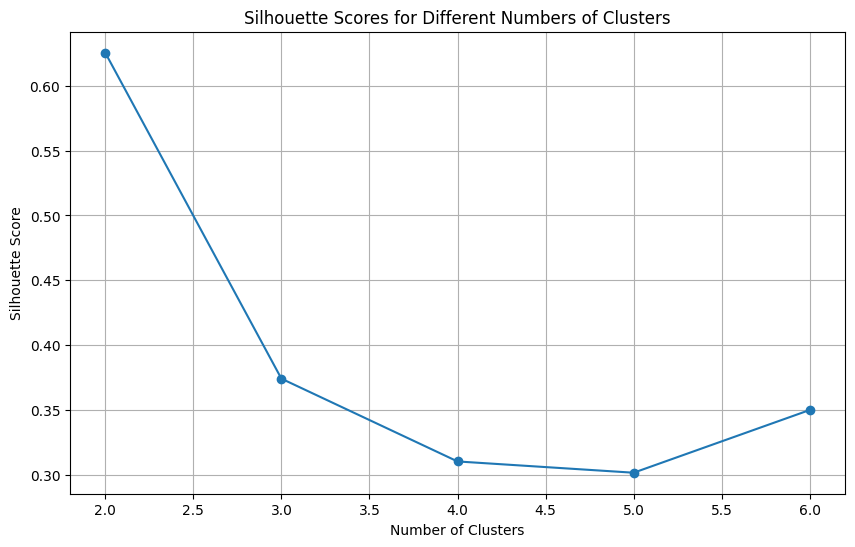

In [24]:
from sklearn.metrics import silhouette_score

# Initialisation des variables pour stocker les meilleurs scores et partitions
best_kmeans_score = -1
best_kmeans_partition = 0
scores = []

# Boucle sur les partitions de 2 à 6 clusters
for n_clusters in range(2, 7):
    # Application de KMeans
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans_labels = kmeans.fit_predict(X_scaled)
    
    # Calcul de l'indice de silhouette
    score = silhouette_score(X_scaled, kmeans_labels)
    scores.append(score)
    
    # Mise à jour des meilleurs scores et partitions
    if score > best_kmeans_score:
        best_kmeans_score = score
        best_kmeans_partition = n_clusters

print(f"Meilleure partition pour KMeans: {best_kmeans_partition} clusters avec un score de silhouette de {best_kmeans_score:.4f}")

# Plotting the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, 7), scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.grid(True)
plt.show()

Meilleur nombre de clusters pour AgglomerativeClustering selon l'indice de silhouette :
- ward: 2 clusters
- average: 2 clusters
- single: 5 clusters


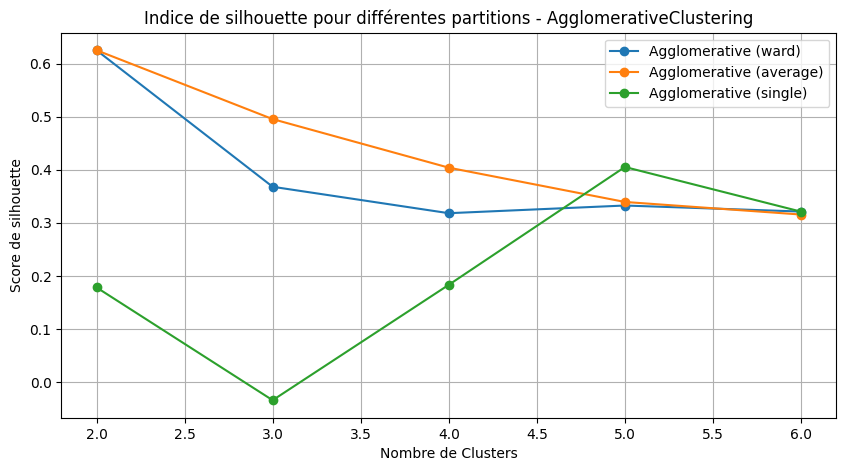

In [27]:
 # Chargement des données
file_path = './villes.csv' 
data = pd.read_csv(file_path, sep=';')

# Séparation des étiquettes (noms des villes) et des données numériques
labels = data.iloc[:, 0].values
X = data.iloc[:, 1:].values  # Toutes les colonnes sauf la première

# Standardisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialisation des variables pour stocker les scores
k_values = [2, 3, 4, 5, 6]
linkage_methods = ['ward', 'average', 'single']
silhouette_scores_agglomerative = {method: [] for method in linkage_methods}

# Boucle sur les différentes valeurs de clusters
for method in linkage_methods:
    for k in k_values:
        # Appliquer AgglomerativeClustering
        agglo = AgglomerativeClustering(n_clusters=k, linkage=method)
        agglo_labels = agglo.fit_predict(X_scaled)
        silhouette_agglo = silhouette_score(X_scaled, agglo_labels)
        silhouette_scores_agglomerative[method].append(silhouette_agglo)

# Détermination du meilleur nombre de clusters pour chaque méthode
best_k_agglomerative = {method: k_values[np.argmax(silhouette_scores_agglomerative[method])] for method in linkage_methods}

# Affichage des meilleurs clusters pour chaque méthode
print("Meilleur nombre de clusters pour AgglomerativeClustering selon l'indice de silhouette :")
for method, best_k in best_k_agglomerative.items():
    print(f"- {method}: {best_k} clusters")

# Affichage des résultats sous forme de graphique
plt.figure(figsize=(10, 5))
for method in linkage_methods:
    plt.plot(k_values, silhouette_scores_agglomerative[method], marker='o', linestyle='-', label=f'Agglomerative ({method})')

plt.xlabel('Nombre de Clusters')
plt.ylabel('Score de silhouette')
plt.title('Indice de silhouette pour différentes partitions - AgglomerativeClustering')
plt.legend()
plt.grid(True)
plt.show()


# Question 5
Avec 3 clusters, on remarque que sur le graphique, la meilleure méthode est la méthode average.